In [1]:
import graphlab
graphlab.version

RuntimeError: module compiled against API version 0xa but this version of numpy is 0x9

A newer version of GraphLab Create (v2.0.1) is available! Your current version is v1.8.3.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


'1.8.3'

In [2]:
products = graphlab.SFrame('amazon_baby_subset.gl/')

[INFO] GraphLab Create v1.8.3 started. Logging: C:\Users\OMARAB~1\AppData\Local\Temp\graphlab_server_1468294086.log.0


In [3]:
important_words = []
important_words = graphlab.SFrame.read_json('important_words.json',orient='lines')

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[list]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\OmarAbdelwahab\important_words.json

Parsing completed. Parsed 1 lines in 0.015001 secs.

In [3]:
important_words = []
important_words_file = open('important_words.txt')
important_words = important_words_file.read().split(', ')

In [4]:
table = graphlab.SFrame({'word': ['(intercept)'] + important_words})

In [5]:
products = products.fillna('review','N/A')

In [6]:
products[products['review']=='']

name,review,rating,sentiment
DEX Products PregnancyPillow PP-01 ...,,5.0,1
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",,5.0,1
Munchkin Auto SeatProtector ...,,4.0,1
Kidkusion Toddler CornerKushions Brown - 8 Pack ...,,5.0,1
"Summer Infant Ultra PlushChange Pad Cover, Blue ...",,5.0,1
"Sassy Baby Changing Pads36 Count Box, White ...",,5.0,1
North States SupergatePressure Mount Clear ...,,5.0,1
American Baby CompanyWaterproof Quilted Co ...,,5.0,1
green sprouts 10 PackWaterproof Absorbent ...,,4.0,1
"Sunshine Kids Buggy Bag,Black ...",,4.0,1


In [7]:
products_empty_reviews = products[products['review']=='']

In [8]:
products_with_reviews = products[products['review']!='']

In [9]:
products_empty_reviews['review'] = products_empty_reviews['review'].apply(lambda x: 'N/A')

RuntimeError: module compiled against API version 0xa but this version of numpy is 0x9

In [10]:
products_empty_reviews

name,review,rating,sentiment
DEX Products PregnancyPillow PP-01 ...,N/A,5.0,1
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",N/A,5.0,1
Munchkin Auto SeatProtector ...,N/A,4.0,1
Kidkusion Toddler CornerKushions Brown - 8 Pack ...,N/A,5.0,1
"Summer Infant Ultra PlushChange Pad Cover, Blue ...",N/A,5.0,1
"Sassy Baby Changing Pads36 Count Box, White ...",N/A,5.0,1
North States SupergatePressure Mount Clear ...,N/A,5.0,1
American Baby CompanyWaterproof Quilted Co ...,N/A,5.0,1
green sprouts 10 PackWaterproof Absorbent ...,N/A,4.0,1
"Sunshine Kids Buggy Bag,Black ...",N/A,4.0,1


In [11]:
products_empty_reviews[products_empty_reviews['review']=='']

name,review,rating,sentiment


In [12]:
#products_initial = products ##backup
import glove

In [13]:
products = products_empty_reviews
products = products.append(products_with_reviews)

In [14]:
len(products)

53072

In [15]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation)

In [16]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [17]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [18]:
products

name,review,rating,sentiment,review_clean,baby,one,great,love,use,would,like
DEX Products PregnancyPillow PP-01 ...,N/A,5.0,1,NA,0,0,0,0,0,0,0
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",N/A,5.0,1,NA,0,0,0,0,0,0,0
Munchkin Auto SeatProtector ...,N/A,4.0,1,NA,0,0,0,0,0,0,0
Kidkusion Toddler CornerKushions Brown - 8 Pack ...,N/A,5.0,1,NA,0,0,0,0,0,0,0
"Summer Infant Ultra PlushChange Pad Cover, Blue ...",N/A,5.0,1,NA,0,0,0,0,0,0,0
"Sassy Baby Changing Pads36 Count Box, White ...",N/A,5.0,1,NA,0,0,0,0,0,0,0
North States SupergatePressure Mount Clear ...,N/A,5.0,1,NA,0,0,0,0,0,0,0
American Baby CompanyWaterproof Quilted Co ...,N/A,5.0,1,NA,0,0,0,0,0,0,0
green sprouts 10 PackWaterproof Absorbent ...,N/A,4.0,1,NA,0,0,0,0,0,0,0
"Sunshine Kids Buggy Bag,Black ...",N/A,4.0,1,NA,0,0,0,0,0,0,0


In [19]:
train_data, validation_data = products.random_split(.8, seed=2)

In [20]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    #feature_matrix = features_frame.as_matrix()
    feature_matrix = features_frame.to_numpy()
    label_sarray = dataframe[label]
    #label_array = label_sarray.as_matrix()
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

In [21]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

## Computing probabilities

In [23]:
import numpy as np
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    score = np.dot(feature_matrix,coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = np.divide(1,np.add(1,np.exp(-score)))
    
    # return predictions
    return predictions

## Computing derivative

In [24]:
def feature_derivative(errors, feature):     
    # Compute the dot product of errors and feature
    derivative = np.dot(errors,feature)
        # Return the derivative
    return derivative

In [25]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    ## YOUR CODE HERE
    derivative = np.dot(errors,feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        ## YOUR CODE HERE
        derivative = np.subtract(derivative,2*l2_penalty*coefficient)
        
    return derivative

In [26]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

In [27]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in xrange(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix,coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in xrange(len(coefficients)): # loop over each coefficient
            #is_intercept = (j == 0)
            if j==0:
                is_intercept = True
                
            if j!=0:
                is_intercept = False
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            ## YOUR CODE HERE
            derivative = feature_derivative_with_L2(errors,feature_matrix[:,j],coefficients[j], l2_penalty, is_intercept)
            
            # add the step size times the derivative to the current coefficient
            ## YOUR CODE HERE
            step = step_size*derivative
            coefficients[j] = np.add(coefficients[j],step)
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print 'iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp)
    return coefficients

In [28]:
import numpy as np
step_size = 5e-6
max_iter = 501
initial_coefficients = np.zeros(194)

In [29]:
feature_matrix = feature_matrix_train
sentiment = sentiment_train
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, 0, max_iter)

iteration   0: log likelihood of observed labels = -29180.71996556
iteration   1: log likelihood of observed labels = -29006.39336272
iteration   2: log likelihood of observed labels = -28838.70598315
iteration   3: log likelihood of observed labels = -28677.11666063
iteration   4: log likelihood of observed labels = -28521.19814220
iteration   5: log likelihood of observed labels = -28370.59715020
iteration   6: log likelihood of observed labels = -28225.01037382
iteration   7: log likelihood of observed labels = -28084.16984406
iteration   8: log likelihood of observed labels = -27947.83385636
iteration   9: log likelihood of observed labels = -27815.78120196
iteration  10: log likelihood of observed labels = -27687.80739281
iteration  11: log likelihood of observed labels = -27563.72210077
iteration  12: log likelihood of observed labels = -27443.34734541
iteration  13: log likelihood of observed labels = -27326.51615046
iteration  14: log likelihood of observed labels = -27213.0715

In [30]:
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, 4, max_iter)

iteration   0: log likelihood of observed labels = -29180.72363802
iteration   1: log likelihood of observed labels = -29006.41478464
iteration   2: log likelihood of observed labels = -28838.75812723
iteration   3: log likelihood of observed labels = -28677.21154336
iteration   4: log likelihood of observed labels = -28521.34692819
iteration   5: log likelihood of observed labels = -28370.81023180
iteration   6: log likelihood of observed labels = -28225.29743604
iteration   7: log likelihood of observed labels = -28084.53992018
iteration   8: log likelihood of observed labels = -27948.29537729
iteration   9: log likelihood of observed labels = -27816.34204074
iteration  10: log likelihood of observed labels = -27688.47490535
iteration  11: log likelihood of observed labels = -27564.50316324
iteration  12: log likelihood of observed labels = -27444.24838861
iteration  13: log likelihood of observed labels = -27327.54319152
iteration  14: log likelihood of observed labels = -27214.2301

In [31]:
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, 10, max_iter)

iteration   0: log likelihood of observed labels = -29180.72914672
iteration   1: log likelihood of observed labels = -29006.44691535
iteration   2: log likelihood of observed labels = -28838.83633284
iteration   3: log likelihood of observed labels = -28677.35383886
iteration   4: log likelihood of observed labels = -28521.57004761
iteration   5: log likelihood of observed labels = -28371.12974792
iteration   6: log likelihood of observed labels = -28225.72785805
iteration   7: log likelihood of observed labels = -28085.09477744
iteration   8: log likelihood of observed labels = -27948.98729348
iteration   9: log likelihood of observed labels = -27817.18280095
iteration  10: log likelihood of observed labels = -27689.47551731
iteration  11: log likelihood of observed labels = -27565.67391355
iteration  12: log likelihood of observed labels = -27445.59889449
iteration  13: log likelihood of observed labels = -27329.08244850
iteration  14: log likelihood of observed labels = -27215.9665

In [32]:
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, 1e2, max_iter)

iteration   0: log likelihood of observed labels = -29180.81177719
iteration   1: log likelihood of observed labels = -29006.92856383
iteration   2: log likelihood of observed labels = -28840.00790443
iteration   3: log likelihood of observed labels = -28679.48416035
iteration   4: log likelihood of observed labels = -28524.90827708
iteration   5: log likelihood of observed labels = -28375.90721884
iteration   6: log likelihood of observed labels = -28232.15958698
iteration   7: log likelihood of observed labels = -28093.38075828
iteration   8: log likelihood of observed labels = -27959.31364473
iteration   9: log likelihood of observed labels = -27829.72280225
iteration  10: log likelihood of observed labels = -27704.39055572
iteration  11: log likelihood of observed labels = -27583.11435182
iteration  12: log likelihood of observed labels = -27465.70486958
iteration  13: log likelihood of observed labels = -27351.98460647
iteration  14: log likelihood of observed labels = -27241.7867

In [33]:
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, 1e3, max_iter)

iteration   0: log likelihood of observed labels = -29181.63808185
iteration   1: log likelihood of observed labels = -29011.71294072
iteration   2: log likelihood of observed labels = -28851.56881358
iteration   3: log likelihood of observed labels = -28700.36871726
iteration   4: log likelihood of observed labels = -28557.42297519
iteration   5: log likelihood of observed labels = -28422.14210008
iteration   6: log likelihood of observed labels = -28294.00835842
iteration   7: log likelihood of observed labels = -28172.55820057
iteration   8: log likelihood of observed labels = -28057.37105186
iteration   9: log likelihood of observed labels = -27948.06187190
iteration  10: log likelihood of observed labels = -27844.27598220
iteration  11: log likelihood of observed labels = -27745.68528737
iteration  12: log likelihood of observed labels = -27651.98537507
iteration  13: log likelihood of observed labels = -27562.89318936
iteration  14: log likelihood of observed labels = -27478.1450

In [34]:
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, 1e5, max_iter)

iteration   0: log likelihood of observed labels = -29272.53159493
iteration   1: log likelihood of observed labels = -29272.39217812
iteration   2: log likelihood of observed labels = -29272.34942186
iteration   3: log likelihood of observed labels = -29272.31289460
iteration   4: log likelihood of observed labels = -29272.27990943
iteration   5: log likelihood of observed labels = -29272.25004336
iteration   6: log likelihood of observed labels = -29272.22299801
iteration   7: log likelihood of observed labels = -29272.19850684
iteration   8: log likelihood of observed labels = -29272.17632863
iteration   9: log likelihood of observed labels = -29272.15624492
iteration  10: log likelihood of observed labels = -29272.13805793
iteration  11: log likelihood of observed labels = -29272.12158852
iteration  12: log likelihood of observed labels = -29272.10667448
iteration  13: log likelihood of observed labels = -29272.09316893
iteration  14: log likelihood of observed labels = -29272.0809

In [35]:
len(feature_matrix[1])

194

<function argsort>

In [147]:
len(coefficients_1e5_penalty)

194

In [36]:
len(table)

194

In [37]:
table['coefficients_0'] = coefficients_0_penalty

In [335]:
table

word,coefficients_0,coefficients_4,coefficients_10,coefficients_1e2,coefficients_1e3
(intercept),-0.0655151294567,-0.0451858357314,-0.0146378054921,0.467313531078,12.0352476345
baby,0.0820092676109,0.0867405791724,0.0939387633907,0.219267276717,3.06397476169
one,0.0117745008434,0.0203003548577,0.0331282920802,0.237828423028,3.89301480977
great,0.791204019897,0.793099957242,0.79621253661,0.878303595746,2.60929969883
love,1.04522372522,1.04108203526,1.03517615574,0.987042092897,1.23577517758
use,-0.00894214634846,-0.00485169608235,0.00130450989622,0.104628065758,1.85539921285
would,-0.307729285901,-0.298293571281,-0.284285792773,-0.0895056811053,1.87543419585
like,-0.001737004782,0.00507044680969,0.0153090083473,0.17700024056,1.84044388293
easy,0.964602679379,0.963481916399,0.962111575557,0.982965000999,1.65757005027
little,0.551739247303,0.555136404693,0.560517695277,0.68271846899,1.97994929081


In [43]:
table_sorted_bycoefficients = table.sort('coefficients_0',ascending = False)

In [44]:
table_sorted_bycoefficients

word,coefficients_0,coefficients_4,coefficients_10,coefficients_1e2,coefficients_1e3,coefficients_1e5
loves,1.0566385949,1.04802913759,1.0353499041,0.874351759256,0.347413013133,0.00615050403434
love,1.04522372522,1.03764750386,1.02650041631,0.885936113515,0.415368413411,0.0089777413532
easy,0.964602679379,0.957861261436,0.947941450494,0.82269918429,0.396005758755,0.00864523337151
perfect,0.842410869951,0.835199566776,0.824575336567,0.689298054895,0.2516600508,0.00399082891955
great,0.791204019897,0.786509708537,0.779597882688,0.691760085884,0.370130359148,0.00883603582663
happy,0.560504812104,0.555550833524,0.548249566589,0.455010552093,0.154121882948,0.00214729545504
little,0.551739247303,0.54846851979,0.543653868307,0.482588542929,0.259726757532,0.00606690735873
best,0.516282997925,0.511705610539,0.504959447128,0.418824815225,0.141437731348,0.001956330394
fits,0.497302347021,0.492985720521,0.48662370538,0.405364139215,0.142411415374,0.00226776409881
well,0.455438729781,0.45251248145,0.448202019565,0.393245657508,0.194219020369,0.00389519922437


In [38]:
table['coefficients_4'] = coefficients_4_penalty

In [39]:
table['coefficients_10'] = coefficients_10_penalty

In [40]:
table['coefficients_1e2'] = coefficients_1e2_penalty

In [41]:
table['coefficients_1e3'] = coefficients_1e3_penalty

In [42]:
table['coefficients_1e5'] = coefficients_1e5_penalty

In [45]:
table_sorted_bycoefficients_negative = table.sort('coefficients_0',ascending = True)

In [46]:
table_sorted_bycoefficients_negative

word,coefficients_0,coefficients_4,coefficients_10,coefficients_1e2,coefficients_1e3
disappointed,-0.971775322137,-0.963158718666,-0.950461155727,-0.788510620544,-0.268897801487
money,-0.759943476372,-0.753943520409,-0.745114308924,-0.633724176008,-0.271180662667
return,-0.721391655897,-0.714995667271,-0.705573701788,-0.585790822271,-0.207881068348
waste,-0.609381640204,-0.604123322409,-0.59638122872,-0.49834163677,-0.18783021033
returned,-0.558094638178,-0.553029138183,-0.545561378851,-0.450004652996,-0.144903829528
broke,-0.51710601139,-0.512460266998,-0.505613041107,-0.418171672508,-0.138942917825
work,-0.504912569485,-0.501343912622,-0.496091158186,-0.429617552363,-0.203281976602
thought,-0.465448533134,-0.46164557333,-0.456044697718,-0.384910531937,-0.153174027027
idea,-0.459881831674,-0.455706561682,-0.449551336194,-0.370786662166,-0.118091508755
cheap,-0.451106022112,-0.447142354967,-0.441301302143,-0.366786592205,-0.127175762504


In [48]:
positive_words = ['loves','love','easy','perfect','great']
negative_words = ['disappointed','money','return','waste','returned']

## Plotting coefficients

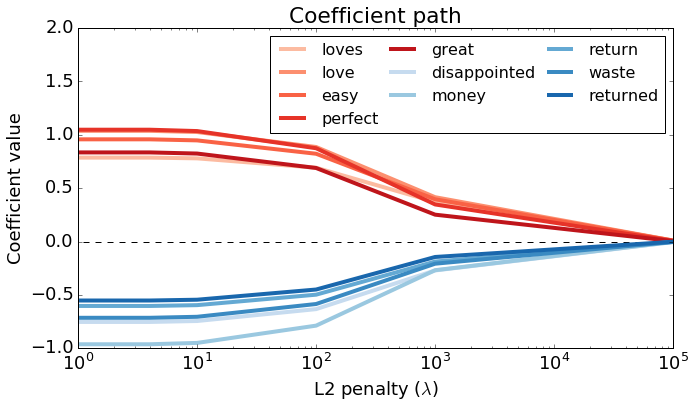

In [49]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    #table_positive_words = table[table['word'].isin(positive_words)]
    table_positive_words = table.filter_by(positive_words,'word')
    #table_negative_words = table[table['word'].isin(negative_words)]
    table_negative_words = table.filter_by(negative_words,'word')
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in xrange(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in xrange(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

In [79]:
from distutils.version import StrictVersion
import numpy
print numpy.__version__
print StrictVersion(numpy.__version__)

1.8.1
1.8.1


In [2]:
import numpy
print numpy.__path__

['numpy']


In [112]:
sentiment_train
for r in sentiment_train:
    
    

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [120]:
scores_0_penalty = np.dot(feature_matrix_train,coefficients_0_penalty)

In [121]:
scores_4_penalty = np.dot(feature_matrix_train,coefficients_4_penalty)

In [122]:
scores_10_penalty = np.dot(feature_matrix_train,coefficients_10_penalty)

In [123]:
scores_1e2_penalty = np.dot(feature_matrix_train,coefficients_1e2_penalty)

In [124]:
scores_1e3_penalty = np.dot(feature_matrix_train,coefficients_1e3_penalty)

In [125]:
scores_1e5_penalty = np.dot(feature_matrix_train,coefficients_1e5_penalty)

In [126]:
scores_0_penalty_valid = np.dot(feature_matrix_valid,coefficients_0_penalty)

In [127]:
scores_4_penalty_valid = np.dot(feature_matrix_valid,coefficients_4_penalty)

In [128]:
scores_10_penalty_valid = np.dot(feature_matrix_valid,coefficients_10_penalty)

In [129]:
scores_1e2_penalty_valid = np.dot(feature_matrix_valid,coefficients_1e2_penalty)

In [130]:
scores_1e3_penalty_valid = np.dot(feature_matrix_valid,coefficients_1e3_penalty)

In [131]:
scores_1e5_penalty_valid = np.dot(feature_matrix_valid,coefficients_1e5_penalty)

In [67]:
sentiment_valid

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [132]:
validation_data['scores_0_penalty_valid'] = scores_0_penalty_valid

In [133]:
validation_data['scores_4_penalty_valid'] = scores_4_penalty_valid

In [134]:
validation_data['scores_10_penalty_valid'] = scores_10_penalty_valid

In [135]:
validation_data['scores_1e2_penalty_valid'] = scores_1e2_penalty_valid

In [136]:
validation_data['scores_1e3_penalty_valid'] = scores_1e3_penalty_valid

In [137]:
validation_data['scores_1e5_penalty_valid'] = scores_1e5_penalty_valid

In [138]:
train_data['scores_0_penalty'] = scores_0_penalty

In [139]:
train_data['scores_4_penalty'] = scores_4_penalty

In [140]:
train_data['scores_10_penalty'] = scores_10_penalty

In [141]:
train_data['scores_1e2_penalty'] = scores_1e2_penalty

In [142]:
train_data['scores_1e3_penalty'] = scores_1e3_penalty

In [143]:
train_data['scores_1e5_penalty'] = scores_1e5_penalty

In [113]:
train_data['sentiment_train'] = sentiment_train

In [144]:
train_data['sentiment_0_penalty'] = train_data['scores_0_penalty'].apply(lambda x: 1 if x>0 else -1 )

In [145]:
train_data['sentiment_4_penalty'] = train_data['scores_4_penalty'].apply(lambda x: 1 if x>0 else -1 )

In [146]:
train_data['sentiment_10_penalty'] = train_data['scores_10_penalty'].apply(lambda x: 1 if x>0 else -1 )

In [147]:
train_data['sentiment_1e2_penalty'] = train_data['scores_1e2_penalty'].apply(lambda x: 1 if x>0 else -1 )

In [148]:
train_data['sentiment_1e3_penalty'] = train_data['scores_1e3_penalty'].apply(lambda x: 1 if x>0 else -1 )

In [149]:
train_data['sentiment_1e5_penalty'] = train_data['scores_1e5_penalty'].apply(lambda x: 1 if x>0 else -1 )

In [150]:
validation_data['sentiment_0_penalty_valid'] = validation_data['scores_0_penalty_valid'].apply(lambda x: 1 if x>0 else -1 )

In [151]:
validation_data['sentiment_4_penalty_valid'] = validation_data['scores_4_penalty_valid'].apply(lambda x: 1 if x>0 else -1 )

In [152]:
validation_data['sentiment_10_penalty_valid'] = validation_data['scores_10_penalty_valid'].apply(lambda x: 1 if x>0 else -1 )

In [153]:
validation_data['sentiment_1e2_penalty_valid'] = validation_data['scores_1e2_penalty_valid'].apply(lambda x: 1 if x>0 else -1 )

In [154]:
validation_data['sentiment_1e3_penalty_Valid'] =validation_data['scores_1e3_penalty_valid'].apply(lambda x: 1 if x>0 else -1 )

In [155]:
validation_data['sentiment_1e5_penalty_valid'] = validation_data['scores_1e5_penalty_valid'].apply(lambda x: 1 if x>0 else -1 )

In [115]:
validation_data['sentiment_valid'] = sentiment_valid

In [156]:
validation_data['correctclassifications_0_pen'] = validation_data.apply(lambda x: 1 if x['sentiment_0_penalty_valid']==x['sentiment_valid'] else 0)

In [157]:
validation_data['correctclassifications_0_pen'].sum()

8418L

In [200]:
len(validation_data) ## Validation Data Accuracy_0_penalty = 78.59

10711

Accuracy of 0 panalty on validation set = 50.10

In [88]:
validation_data['correctclassifications_4_pen'] = validation_data.apply(lambda x: 1 if x['sentiment_4_penalty_valid']==x['sentiment'] else 0)

In [89]:
validation_data['correctclassifications_4_pen'].sum() ## Validation Data Accuracy_4_penalty = 78.63

8422L

In [90]:
validation_data['correctclassifications_1e2_pen'] = validation_data.apply(lambda x: 1 if x['sentiment_1e2_penalty_valid']==x['sentiment'] else 0)

In [91]:
validation_data['correctclassifications_1e3_pen'] = validation_data.apply(lambda x: 1 if x['sentiment_1e3_penalty_Valid']==x['sentiment'] else 0)

In [92]:
validation_data['correctclassifications_10_pen'] = validation_data.apply(lambda x: 1 if x['sentiment_10_penalty_valid']==x['sentiment'] else 0)

In [93]:
validation_data['correctclassifications_1e5_pen'] = validation_data.apply(lambda x: 1 if x['sentiment_1e5_penalty_valid']==x['sentiment'] else 0)

In [97]:
#validation_data['correctclassifications_10_pen'].sum() ##78.61 acc_10_validation ##8420
#validation_data['correctclassifications_1e2_pen'].sum() ##78.44 8402
#validation_data['correctclassifications_1e3_pen'].sum() ##77.85  8338
validation_data['correctclassifications_1e5_pen'].sum() ##68.40 7326

7326L

In [158]:
train_data['correctclassifications_10_pen'] = train_data.apply(lambda x: 1 if x['sentiment_10_penalty']==x['sentiment'] else 0)

In [159]:
#train_data['correctclassifications_1e2_pen'].sum() ## 78.22 ##33139
#train_data['correctclassifications_1e3_pen'].sum() ## 77.38 ##32782
#train_data['correctclassifications_1e5_pen'].sum() ## 69.03 ##29240
#train_data['correctclassifications_0_pen'].sum() ## 78.36 ##33192
#train_data['correctclassifications_4_pen'].sum() ## 78.37 ##33197
train_data['correctclassifications_10_pen'].sum() ## 78.37 ##33201

33201L

In [111]:
feature_matrix[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [130]:
train_data['sentiment_1e5_penalty']

dtype: int
Rows: 42361
[-1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, -1L, ... ]

In [131]:
scores_0_penalty

array([ -50.54507698,  -50.54507698,  -50.54507698, ...,  -98.09912608,
       -237.55205049, -182.96340149])

In [133]:
train_data[train_data['scores_0_penalty']>0]

Columns:
	name	str
	review	str
	rating	float
	sentiment	int
	review_clean	str
	baby	int
	one	int
	great	int
	love	int
	use	int
	would	int
	like	int
	easy	int
	little	int
	seat	int
	old	int
	well	int
	get	int
	also	int
	really	int
	son	int
	time	int
	bought	int
	product	int
	good	int
	daughter	int
	much	int
	loves	int
	stroller	int
	put	int
	months	int
	car	int
	still	int
	back	int
	used	int
	recommend	int
	first	int
	even	int
	perfect	int
	nice	int
	bag	int
	two	int
	using	int
	got	int
	fit	int
	around	int
	diaper	int
	enough	int
	month	int
	price	int
	go	int
	could	int
	soft	int
	since	int
	buy	int
	room	int
	works	int
	made	int
	child	int
	keep	int
	size	int
	small	int
	need	int
	year	int
	big	int
	make	int
	take	int
	easily	int
	think	int
	crib	int
	clean	int
	way	int
	quality	int
	thing	int
	better	int
	without	int
	set	int
	new	int
	every	int
	cute	int
	best	int
	bottles	int
	work	int
	purchased	int
	right	int
	lot	int
	side	int
	happy	int
	comfortable	int
	toy	int
	able	int
	kids	int
	bit	int
	night	int
	long	int
	fits	int
	see	int
	us	int
	another	int
	play	int
	day	int
	money	int
	monitor	int
	tried	int
	thought	int
	never	int
	item	int
	hard	int
	plastic	int
	however	int
	disappointed	int
	reviews	int
	something	int
	going	int
	pump	int
	bottle	int
	cup	int
	waste	int
	return	int
	amazon	int
	different	int
	top	int
	want	int
	problem	int
	know	int
	water	int
	try	int
	received	int
	sure	int
	times	int
	chair	int
	find	int
	hold	int
	gate	int
	open	int
	bottom	int
	away	int
	actually	int
	cheap	int
	worked	int
	getting	int
	ordered	int
	came	int
	milk	int
	bad	int
	part	int
	worth	int
	found	int
	cover	int
	many	int
	design	int
	looking	int
	weeks	int
	say	int
	wanted	int
	look	int
	place	int
	purchase	int
	looks	int
	second	int
	piece	int
	box	int
	pretty	int
	trying	int
	difficult	int
	together	int
	though	int
	give	int
	started	int
	anything	int
	last	int
	company	int
	come	int
	returned	int
	maybe	int
	took	int
	broke	int
	makes	int
	stay	int
	instead	int
	idea	int
	head	int
	said	int
	less	int
	went	int
	working	int
	high	int
	unit	int
	seems	int
	picture	int
	completely	int
	wish	int
	buying	int
	babies	int
	won	int
	tub	int
	almost	int
	either	int
	constant	int
	scores_0_penalty	float
	scores_4_penalty	float
	scores_10_penalty	float
	scores_1e2_penalty	float
	scores_1e3_penalty	float
	scores_1e5_penalty	float
	sentiment_0_penalty	int
	sentiment_4_penalty	int
	sentiment_10_penalty	int
	sentiment_1e2_penalty	int
	sentiment_1e3_penalty	int
	sentiment_1e5_penalty	int
	correctclassifications_1e5_pen	int
	correctclassifications_1e2_pen	int

Rows: Unknown

Data:
	[]

In [5]:
pos_nonpos_model = graphlab.load_model('pos_nonpos_classifier')

In [6]:
neg_nonneg_model = graphlab.load_model('neg_nonneg_classifier')

In [ ]:
SemEval2017-task4-dev.subtask-A.english.INPUT

In [ ]:
Devset = 